# Tokenization
The first step in creating a `Doc` object is to break down the incoming text into component pieces or "tokens".

In [1]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
# Create a string that includes opening and closing quotation marks
mystring = '"We\'re moving to L.A.!"'
print(mystring)

"We're moving to L.A.!"


In [3]:
# Create a Doc object and explore tokens
doc = nlp(mystring)

for token in doc:
    print(token.text, end=' | ')

" | We | 're | moving | to | L.A. | ! | " | 

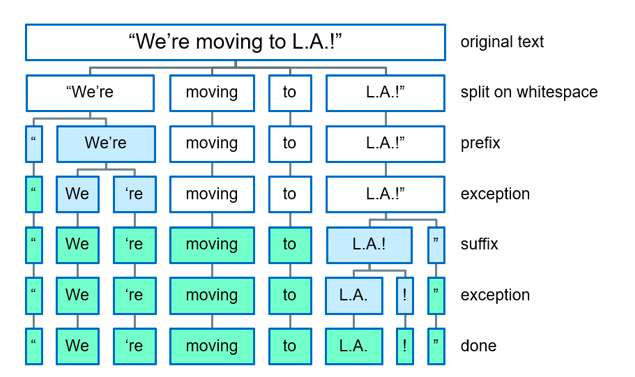

-  **Prefix**:	Character(s) at the beginning &#9656; `$ ( “ ¿`
-  **Suffix**:	Character(s) at the end &#9656; `km ) , . ! ”`
-  **Infix**:	Character(s) in between &#9656; `- -- / ...`
-  **Exception**: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied &#9656; `St. U.S.`

Notice that tokens are pieces of the original text. That is, we don't see any conversion to word stems or lemmas (base forms of words) and we haven't seen anything about organizations/places/money etc. Tokens are the basic building blocks of a Doc object - everything that helps us understand the meaning of the text is derived from tokens and their relationship to one another.

## Prefixes, Suffixes and Infixes
spaCy will isolate punctuation that does *not* form an integral part of a word. Quotation marks, commas, and punctuation at the end of a sentence will be assigned their own token. However, punctuation that exists as part of an email address, website or numerical value will be kept as part of the token.

In [ ]:
doc2 = nlp(u"We're here to help! Send snail-mail, email support@oursite.com or visit us at http://www.oursite.com!")

for t in doc2:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@oursite.com
or
visit
us
at
http://www.oursite.com
!


<font color=green>Note that the exclamation points, comma, and the hyphen in 'snail-mail' are assigned their own tokens, yet both the email address and website are preserved.</font>

In [ ]:
doc3 = nlp(u'A 5km NYC cab ride costs $10.30')

for t in doc3:
    print(t)

A
5
km
NYC
cab
ride
costs
$
10.30


<font color=green>Here the distance unit and dollar sign are assigned their own tokens, yet the dollar amount is preserved.</font>

## Exceptions
Punctuation that exists as part of a known abbreviation will be kept as part of the token.

In [ ]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")

for t in doc4:
    print(t)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


<font color=green>Here the abbreviations for "Saint" and "United States" are both preserved.</font>

## Counting Tokens
`Doc` objects have a set number of tokens:

In [ ]:
len(doc)

8

## Counting Vocab Entries
`Vocab` objects contain a full library of items!

In [ ]:
len(doc.vocab)

57852

<font color=green>NOTE: This number changes based on the language library loaded at the start, and any new lexemes introduced to the `vocab` when the `Doc` was created.</font>

## Tokens can be retrieved by index position and slice
`Doc` objects can be thought of as lists of `token` objects. As such, individual tokens can be retrieved by index position, and spans of tokens can be retrieved through slicing:

In [ ]:
doc5 = nlp(u'It is better to give than to receive.')

# Retrieve the third token:
doc5[2]

better

In [ ]:
# Retrieve three tokens from the middle:
doc5[2:5]

better to give

In [ ]:
# Retrieve the last four tokens:
doc5[-4:]

than to receive.

## Tokens cannot be reassigned
Although `Doc` objects can be considered lists of tokens, they do *not* support item reassignment:

In [ ]:
doc6 = nlp(u'My dinner was horrible.')
doc7 = nlp(u'Your dinner was delicious.')

In [ ]:
# Try to change "My dinner was horrible" to "My dinner was delicious"
doc6[3] = doc7[3]

TypeError: 'spacy.tokens.doc.Doc' object does not support item assignment

___
# Named Entities
Going a step beyond tokens, *named entities* add another layer of context. The language model recognizes that certain words are organizational names while others are locations, and still other combinations relate to money, dates, etc. Named entities are accessible through the `ents` property of a `Doc` object.

In [ ]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


<font color=green>Note how two tokens combine to form the entity `Hong Kong`, and three tokens combine to form the monetary entity:  `$6 million`</font>

In [ ]:
len(doc8.ents)

3

Named Entity Recognition (NER) is an important machine learning tool applied to Natural Language Processing.<br>We'll do a lot more with it in an upcoming section. For more info on **named entities** visit https://spacy.io/usage/linguistic-features#named-entities

---
# Noun Chunks
Similar to `Doc.ents`, `Doc.noun_chunks` are another object property. *Noun chunks* are "base noun phrases" – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, in [Sheb Wooley's 1958 song](https://en.wikipedia.org/wiki/The_Purple_People_Eater), a *"one-eyed, one-horned, flying, purple people-eater"* would be one long noun chunk.

In [ ]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

Autonomous cars
insurance liability
manufacturers


In [ ]:
doc10 = nlp(u"Red cars do not carry higher insurance rates.")

for chunk in doc10.noun_chunks:
    print(chunk.text)

Red cars
higher insurance rates


In [ ]:
doc11 = nlp(u"He was a one-eyed, one-horned, flying, purple people-eater.")

for chunk in doc11.noun_chunks:
    print(chunk.text)

He
a one-eyed, one-horned, flying, purple people-eater


We'll look at additional noun_chunks components besides `.text` in an upcoming section.<br>For more info on **noun_chunks** visit https://spacy.io/usage/linguistic-features#noun-chunks

___
# Built-in Visualizers

spaCy includes a built-in visualization tool called **displaCy**. displaCy is able to detect whether you're working in a Jupyter notebook, and will return markup that can be rendered in a cell right away. When you export your notebook, the visualizations will be included as HTML.

For more info visit https://spacy.io/usage/visualizers

## Visualizing the dependency parse
Run the cell below to import displacy and display the dependency graphic

In [ ]:
from spacy import displacy

doc = nlp(u'Apple is going to build a U.K. factory for $6 million.')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

The optional `'distance'` argument sets the distance between tokens. If the distance is made too small, text that appears beneath short arrows may become too compressed to read.

## Visualizing the entity recognizer

In [ ]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.')
displacy.render(doc, style='ent', jupyter=True)

Now you should have an understanding of how tokenization divides text up into individual elements, how named entities provide context, and how certain tools help to visualize grammar rules and entity labels.
